### Установка TensоrFlow и Keras 

In [19]:
# !pip install tensorflow==2.1.0 Keras==2.3.1

### Импорт необходимых инструментов

In [85]:
import tensorflow as tf # Машинное обучение
import keras # API для TensorFlow
import numpy as np # Научные вычисления
import matplotlib.pyplot as plt # Визуализация 2D и 3D графики
import pandas as pd # Обработка и анализ данных
import seaborn as sns # Визуализация (надстройка над matplotlib)
import pylab # Построение графиков

### Настройки необходимых инструментов

In [35]:
pd.set_option('display.max_columns', None) # Максимальное количество отображаемых столбцов
pd.set_option('display.max_rows', None) # Максимальное количество отображаемых строк

### Загрузка модели

In [21]:
mnist = tf.keras.datasets.fashion_mnist # Загрузка набора данных Fashion-MNIST

### Загрузка набора данных и разбиение на обучающие и тестовые выборки

In [22]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

### Отображение изображения из обучающей выборки

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 154 155 170 165 14

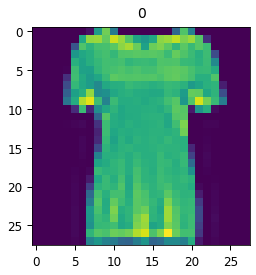

In [23]:
num = 10 # Номер изображения

np.set_printoptions(linewidth = 200) # Количество символов в строке для вставки разрывов строк 
print(training_images[num])

# Создание новой фигуры
plt.figure(
    figsize = (4, 4) # Размер фигуры в дюймах
)

ax = plt.axes() # Добавление осей к текущей фигуре

# Заголовок осей
ax.set_title(
    label = training_labels[num], # Заголовок
    fontdict = {
        'fontsize': 14, # Размер заголовка
        'color': '#000000' # Цвет заголовка
    },
    pad = 10 # Отступ заголовка от вершины осей
)

# Изменение внешнего вида меток
ax.tick_params(
    axis = 'x', # Ось
    direction = 'out', # Расположение линий меток
    length = 5, # Длина линий меток
    width = 1, # Ширина линий меток 
    color = '#000000', # Цвет линий меток
    pad = 5, # Расстояние между линиями меток и метками
    labelsize = 12, # Размер метки
    labelcolor = '#000000', # Цвет метки
    bottom = True,  # Рисование линий меток
)
ax.tick_params(
    axis = 'y', # Ось
    direction = 'out', # Расположение линий меток
    length = 5, # Длина линий меток
    width = 1, # Ширина линий меток 
    color = '#000000', # Цвет линий меток
    pad = 5, # Расстояние между линиями меток и метками
    labelsize = 12, # Размер метки
    labelcolor = '#000000', # Цвет метки
    left = True  # Рисование линий меток
)

plt.imshow(training_images[num]) # Отображение массива данных в виде изображения

plt.show() # Отображение фигуры

### Формат обучающей и тестовой выборки

In [25]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

### Нормализация набора изображений и диапазона `[0:255]` в диапазон `[0:1]`

In [26]:
training_images = training_images / 255.0 # Обучающая выборка
test_images = test_images / 255.0 # Тестовая выборка

### Определение модели нейронной сети

**Sequential**: Последовательные слои в нейронной сети

**Dense**: Добавление слоя с нейронами

In [27]:
# Модель с последовательными слоями в нейронной сети
model = keras.Sequential([
    # Сверточный слой
    keras.layers.Conv2D(
        64, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu, # Функция активации
        input_shape = (28, 28, 1) # Размер входных данных
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    # Сверточный слой
    keras.layers.Conv2D(
        64, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu # Функция активации
    ),
    keras.layers.MaxPooling2D(2,2), # Уменьшение размерности
    keras.layers.Flatten(), # Преобразование массива пикселей в вектор пикселей
    # Полносвязный скрытый слой
    keras.layers.Dense(
        units = 512, # Количество нейронов
        activation = tf.nn.relu # Функция активации
    ),
    # Полносвязный слой
    keras.layers.Dense(
        10, # Количество нейронов = количество классов
        activation = tf.nn.softmax # Функция активации
    )
])

### Построение модели нейронной сети

In [28]:
# Сборка модели
model.compile(
    optimizer = tf.optimizers.Adam(), # Оптимизатор
    loss = 'sparse_categorical_crossentropy', # Функция потерь
    metrics = ['accuracy'] # Метрика оценивания
)

### Визуализация модели

In [29]:
model.summary() # Визуализация модели

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

### Остановка процесса обучения

In [30]:
class myCallback(keras.callbacks.Callback):
    """
    Остановка процесса обучения
    """
    
    def on_epoch_end(self, epoch, logs = {}):
        # Сравнение точности на текущей эпохе
        if(logs.get('accuracy') > 0.95):
              self.model.stop_training = True # Остановка обучения

### Обучение модели

In [31]:
callbacks = myCallback() # Остановка процесса обучения

# Обучение модели
model.fit(
    training_images, # Обучающий набор данных
    training_labels, # Метки классов
    epochs = 5, # Количество эпох
    verbose = True, # Отключение вывода
    callbacks = [callbacks] # Вызов функции после каждой эпохи
)

Epoch 1/5
60000/60000 [==============================] - 49s 813us/step - loss: 0.4152 - accuracy: 0.8479
Epoch 2/5
60000/60000 [==============================] - 49s 815us/step - loss: 0.2784 - accuracy: 0.8973
Epoch 3/5
60000/60000 [==============================] - 49s 815us/step - loss: 0.2334 - accuracy: 0.9130
Epoch 4/5
60000/60000 [==============================] - 50s 826us/step - loss: 0.1959 - accuracy: 0.9259
Epoch 5/5
60000/60000 [==============================] - 49s 814us/step - loss: 0.1673 - accuracy: 0.9364


### Проверка работы модели на тестовой выборке

In [32]:
model.evaluate(
    test_images, # Тестовый набор данных
    test_labels  # Метки классов
)

10000/10000 [==============================] - 2s 219us/step


[0.2587265126526356, 0.9071000218391418]

### Получение вероятностей, что определенное изображение в тестовом наборе данных является каждым из 10 классов

In [33]:
classifications = model.predict(test_images) # Предсказания для тестового набора данных

classifications = np.around(classifications, 3) # Округление предсказаний

num = 4 # Номер изображения в тестовом наборе данных

# Отображение в DataFrame
df_classifications = pd.DataFrame(data = classifications[num]).transpose() # Вероятности
df_classifications.head(None) # Отображение первых N строк или все если указать None

,0,1,2,3,4,5,6,7,8,9
0,0.131,0.0,0.001,0.001,0.003,0.0,0.864,0.0,0.0,0.0


### Отображение меток классов

In [57]:
num = 45 # Количество отображаемых меток

# Отображение в DataFrame
df_classifications = pd.DataFrame(data = test_labels[:num]).transpose() # Метки классов
df_classifications.head(None) # Отображение первых N строк или все если указать None

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,9,2,1,1,6,1,4,6,5,7,4,5,7,3,4,1,2,4,8,0,2,5,7,9,1,4,6,0,9,3,8,8,3,3,8,0,7,5,7,9,6,1,3,7,6


### Визуализация процесса сверток и уменьшения размерности

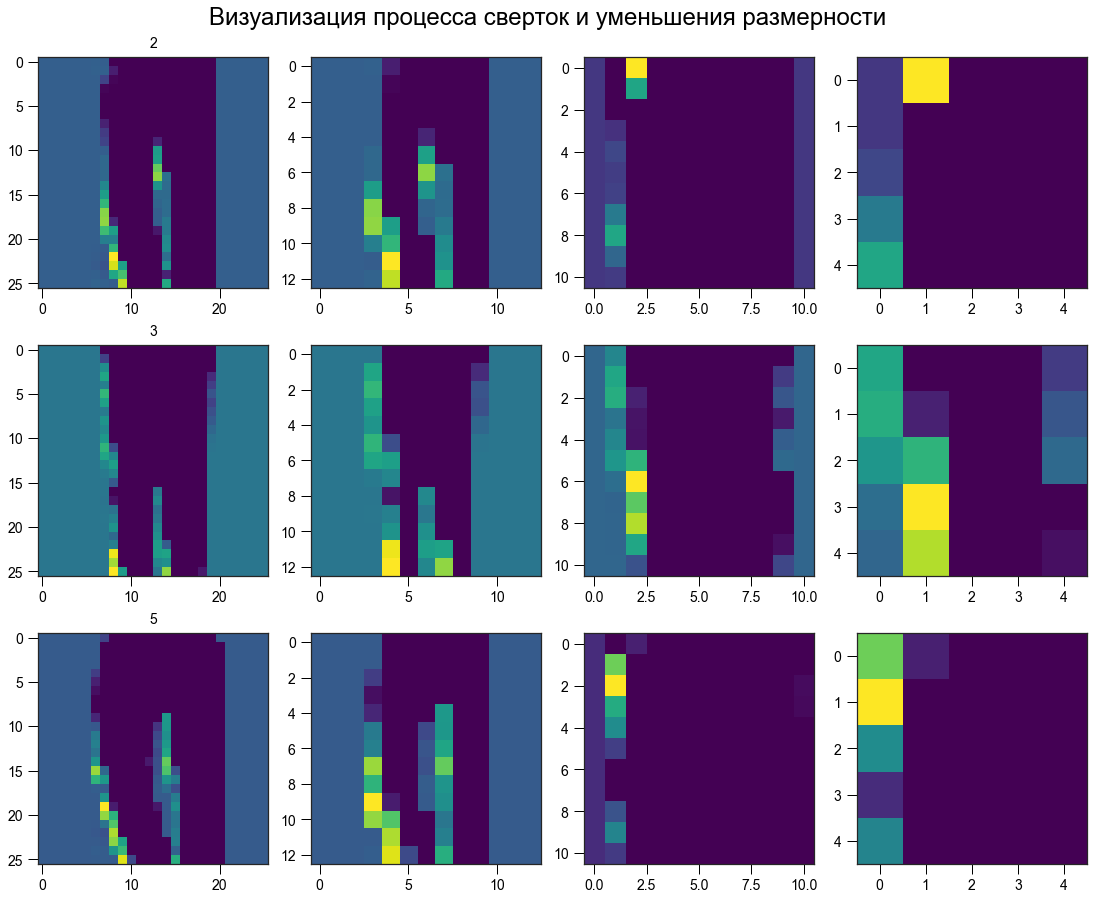

In [160]:
conv_num = 10 # Номер свертки
cols = 4 # Количество столбцов
rows = [2, 3, 5] # Количество строк (индексы меток классов)

layer_outputs = [layer.output for layer in model.layers] # Выходные слои

# Объединение слоев в объект с функциями обучения и вывода
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Создание новой фигуры
fig = plt.figure(
    figsize = (15, 12) # Размер фигуры в дюймах
)

# Установка эстетических параметров
sns.set(
    style = 'white', # Стиль
    palette = 'muted', # Пальтра
    color_codes = True
)
sns.despine(left = True)

# Цветовая палитра
cmap = 'viridis' # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# Проход по всем столбцам
for i in range(0, cols):
    # Проход по всем строкам
    for j in range(0, len(rows)):
        # Создание оси в определенном месте внутри регулярной сетки
        ax = pylab.subplot2grid((len(rows), cols), (j, i))
        
        if i == 0:
            # Заголовок осей
            ax.set_title(
                label = rows[j], # Заголовок
                fontdict = {
                    'fontsize': 14, # Размер заголовка
                    'color': '#000000' # Цвет заголовка
                },
                pad = 10 # Отступ заголовка от вершины осей
            )
        
        # Изменение внешнего вида меток
        ax.tick_params(
            axis = 'x', # Ось
            direction = 'out', # Расположение линий меток
            length = 10, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            bottom = True,  # Рисование линий меток
        )
        ax.tick_params(
            axis = 'y', # Ось
            direction = 'out', # Расположение линий меток
            length = 10, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            left = True  # Рисование линий меток
        )
        
         # Предсказание
        f = activation_model.predict(test_images[rows[j]].reshape(1, 28, 28, 1))[i]
        
        # Отображение данных в виде изображения
        ax.imshow(f[0, : , :, conv_num], cmap = cmap)
        ax.grid(False) # Отключение сетки

# Заголовок фигуры
pylab.suptitle(
    t = 'Визуализация процесса сверток и уменьшения размерности', # Заголовок
    fontsize = 24, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 1.03 # Отступ заголовка от вершины осей
)

fig.tight_layout(pad = 0) # Установка расстояния между осями

plt.show() # Отображение фигуры